<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 4. Dimensionality reduction and Clustering**

A flavor network is a network that is constructed by considering the ingredients and flavor compounds in a recipe. The code for classification is available online.

## **Q1. Modify the clustering code to visualize clustering for all the various types of cuisines and not just 4.**



The original code is performing a t-SNE(t-Distributed Stochastic Neighbor Embedding) clustering and visualization of recipes based on their ingredients and flavors.

- `tsne_cluster_cuisine:` This function performs t-SNE clustering on a subset of cuisines. It takes a DataFrame and a list of cuisines as input. It subsets the DataFrame for the given cuisines, calculates the cosine distance between the recipes, and applies t-SNE to these distances. The function then plots the t-SNE results, with different cuisines represented by different colors.

- `plot_bokeh:` This function creates an interactive plot using Bokeh. It performs similar steps as the `tsne_cluster_cuisine` function but instead of using Matplotlib for plotting, it uses Bokeh. This allows for interactive plots where you can hover over points to see more information.

- `main:`  the code reads in pickled data files containing information about recipes. It then selects four cuisines and applies the `tsne_cluster_cuisine` function to both the ingredient and flavor data. Finally, it uses the `plot_bokeh` function to create interactive plots for both the ingredient and flavor data.

**Changes made:**

- Print statements have been updated in all functions to be compatible with python3

- `init=random` has been added to both functions to initialize the t-SNE embedding with random config.

- Also changed is the way colors are assigned to the scatter plot. Instead of using a fixed color palette (`['red','green','blue','yellow']`), now a Seaborn color palette is being used that generates as many colors as there are cuisines.

- finally, instead of selecting 4 cuisines all unique cuisines from the dataframe are being added.

(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


<ipython-input-26-4346eab79fe7>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='color' [no close matches], hatch_color='color' [no close matches], line_color='color' [no close matches] {renderer: GlyphRenderer(id='p1153', ...)}


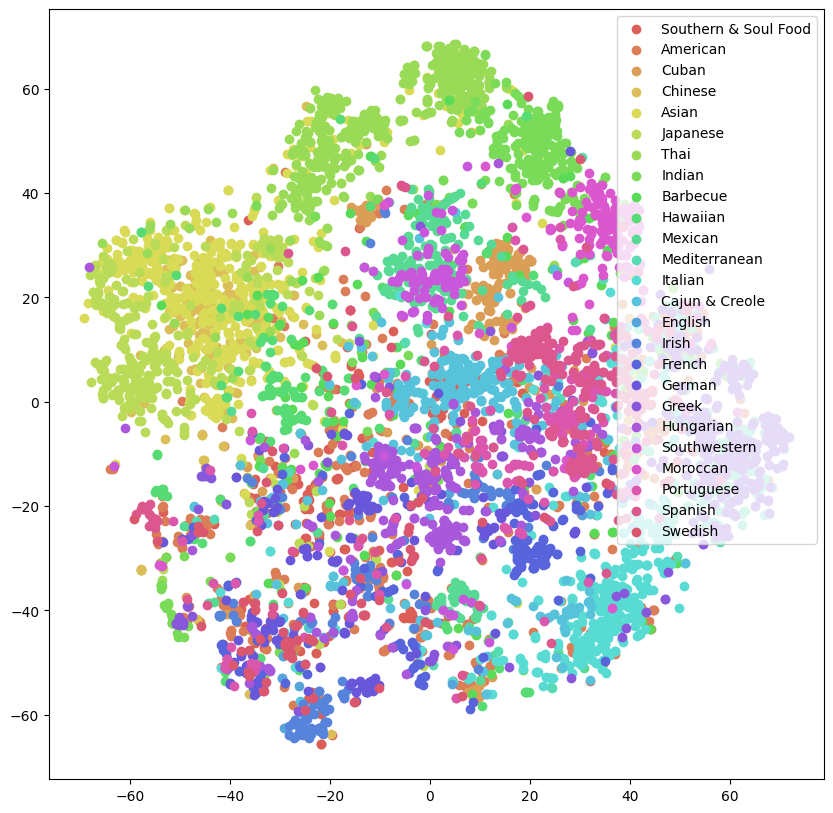

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed',init='random').fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()

#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
def plot_bokeh(df,sublist,filename):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed',init='random').fit_transform(dist)
    #cannot use seaborn palette for bokeh
    palette = sns.color_palette("hls",len(sublist))
    colors =[]
    for i in range(len(sublist)):
        for j in range(lenlist[i+1]-lenlist[i]):
            colors.append(palette[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName']))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(tools=[hover], title="flavor clustering")
    p.circle('x', 'y', color='color', source=source)
    show(p)


if __name__ == '__main__':
    yum_ingr = pd.read_pickle('yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('yummly_ingrX.pkl')

    #select all cuisines and plot tsne clustering with ingredients
    sublist = yum_ingr.cuisine.unique()
    df_ingr = yum_ingrX.copy()
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_ingr,sublist)
    plot_bokeh(df_ingr, sublist, 'plot.html')

## **Q2. For this dataset, apply PCA analysis and measure how many components are required to explain 95% variability in the data? List down what percentage of variability is explained by each component.**

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_df = df_ingr.drop(['cuisine', 'recipeName'], axis=1).values
scaled_df = StandardScaler().fit_transform(pca_df)
pca = PCA(n_components = 0.95).fit(scaled_df)
pca_reduced_df = pca.transform(scaled_df)

print('Original components: ',scaled_df.shape[-1])
print('Number of components required to explain 95% of variability: ', pca_reduced_df.shape[-1])

Original components:  349
Number of components required to explain 95% of variability:  292


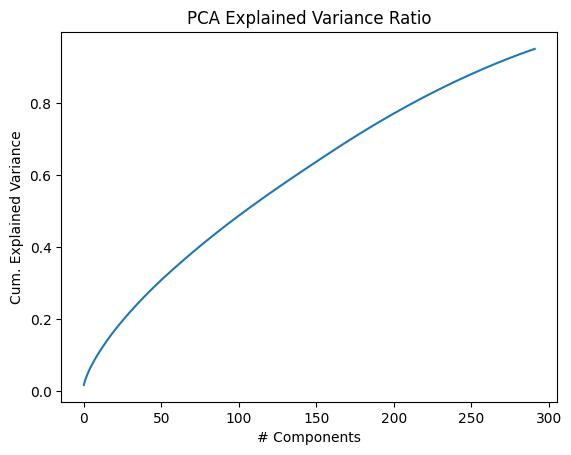

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.axvline(x=pca_reduced_df.shape[-1], color='red', linestyle='--', label=f'{pca_reduced_df.shape[-1]} Components (95%)')
plt.xlabel('# Components')
plt.ylabel('Cum. Explained Variance')
plt.title('PCA Explained Variance Ratio')
# plt.legend()
plt.show()

The results show that the original data had 349 components (i.e., 349 different ingredients). After PCA, the dimensionality of the data was reduced to 292 components while still retaining 95% of the variance. This means that 57 components were removed during PCA, reducing the dimensionality of the data by about 16%.

In [4]:
exp_var = pca.explained_variance_ratio_
for i, var in enumerate(exp_var):
  print("Component", i+1, "explains", round(var*100, 2), "% of the variability.")

Component 1 explains 1.7 % of the variability.
Component 2 explains 1.46 % of the variability.
Component 3 explains 1.17 % of the variability.
Component 4 explains 1.02 % of the variability.
Component 5 explains 0.95 % of the variability.
Component 6 explains 0.84 % of the variability.
Component 7 explains 0.79 % of the variability.
Component 8 explains 0.77 % of the variability.
Component 9 explains 0.76 % of the variability.
Component 10 explains 0.71 % of the variability.
Component 11 explains 0.69 % of the variability.
Component 12 explains 0.67 % of the variability.
Component 13 explains 0.64 % of the variability.
Component 14 explains 0.63 % of the variability.
Component 15 explains 0.63 % of the variability.
Component 16 explains 0.63 % of the variability.
Component 17 explains 0.6 % of the variability.
Component 18 explains 0.59 % of the variability.
Component 19 explains 0.58 % of the variability.
Component 20 explains 0.56 % of the variability.
Component 21 explains 0.55 % of

## **Q3. Use K means algorithm to cluster these data points.**

- **Show silhouette, and elbow analysis by plotting the relevant graph to show the choice of K.**
- **Do you think there is an ‘optimal’ clustering for this data? Explain your reasoning**

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []

for k in range(2, 25):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(pca_reduced_df)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(pca_reduced_df, kmeans.labels_))

In [37]:
print(inertias)

[2044255.7151752086, 2028838.3932230123, 2015759.8037662616, 1990354.4481950689, 1984275.5178163499, 1971808.4628194077, 1967820.7462161328, 1954050.6927995714, 1943819.173426265, 1936126.3395404236, 1923012.9273448412, 1916835.4315488357, 1905270.485873273, 1894745.0722806088, 1890786.7740616575, 1885583.8464847186, 1873169.498374165, 1860343.641644664, 1860889.5487315138, 1838304.5824677674, 1842624.4994838792, 1834655.33633992, 1819069.717180272]


In [38]:
print(silhouette_scores)

[0.04715308186934413, 0.01376297193972259, 0.02271808742483613, 0.00906531857030012, 0.01890662705735798, 0.011374027600964998, 0.0074404894844562145, 0.008251190099760775, 0.00952032790972044, 0.014732813391869668, 0.01706659802355533, 0.020796241072386035, 0.01181729792410966, 0.016928451263230605, 0.0071088889418182005, 0.022064511701956974, 0.015506551694220723, 0.008749666548419185, 0.0179917738753545, 0.01564980219736652, 0.004897349780184056, 0.01310374682638643, 0.019185778639178294]


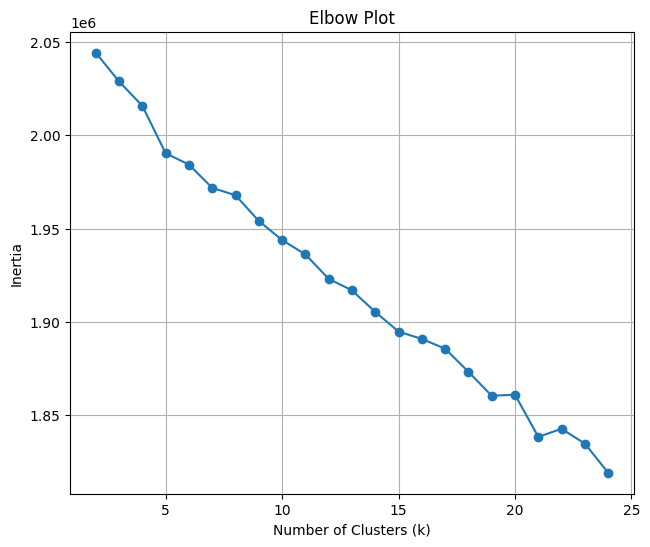

In [35]:
# Elbow Plot
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 25), inertias, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

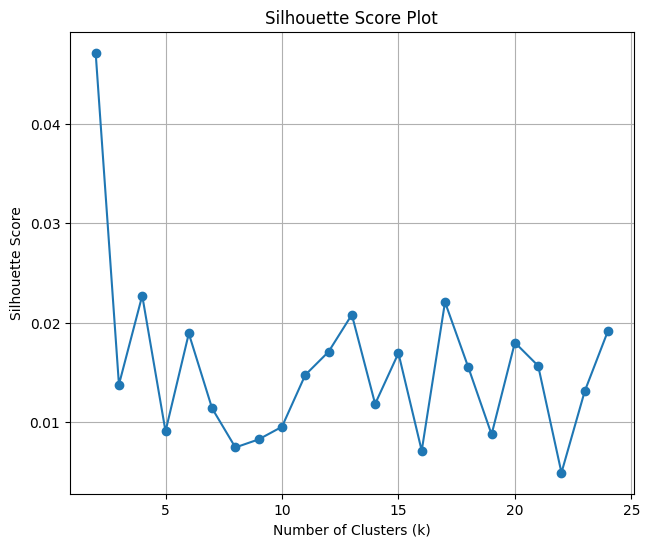

In [36]:
# Silhouette Score Plot
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 25), silhouette_scores, marker='o')
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

Choosing the optimal number of clusters, k, in k-means clustering is a balance between minimizing the inertia (sum of squared distances within clusters) and maximizing the silhouette score (measure of how similar an object is to its own cluster compared to other clusters).

Looking at the scores and plots there is a slight elbow point `k=12` and the rate decrease slows down, suggesting that adding more clusters beyond this point might not provide much benefit.

While the silhouette scores also have a peak near `k=13`, but the number fluctuates as the number of cluster increases. A clear peak would have indicated an optimal k, which is not the case.

Given these observations, we can't decide an optimal k, however k =13 as a potential choice since inertia starts to decrease slowly and silhouette also has a peak around that point

Looking at the inertia and silhouette scores, there doesn't seem to be an 'optimal' number of clusters would be. The inertia decreases as the number of clusters increases, but there doesn’t seem to be a clear ‘elbow point’. The silhouette scores fluctuate as the number of clusters increases, without showing a clear peak.

 It’s also possible that k-means might not be the best clustering algorithm for this particular dataset, especially if the clusters in the data are not spherical or have different densities. Other clustering algorithms like DBSCAN or hierarchical clustering might yield better results in such cases.

## **Q4. Use DBSCAN, Hierarchical clustering and GMM to cluster these data points.**

## **DBSCAN**

<ipython-input-56-769cce5603df>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg, 'noise': n_noise}, ignore_index=True)
<ipython-input-56-769cce5603df>:20: UserWarning: 
The palette list has fewer values (50) than needed (62) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=pca_reduced_df[:, 0], y=pca_reduced_df[:, 1], hue=labels, palette=custom_palette, ax=ax, s=50)
<ipython-input-56-769cce5603df>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg, 'noise': n_noise}, ignore_index=True)
<ipython-input-56-769cce5603df>:20

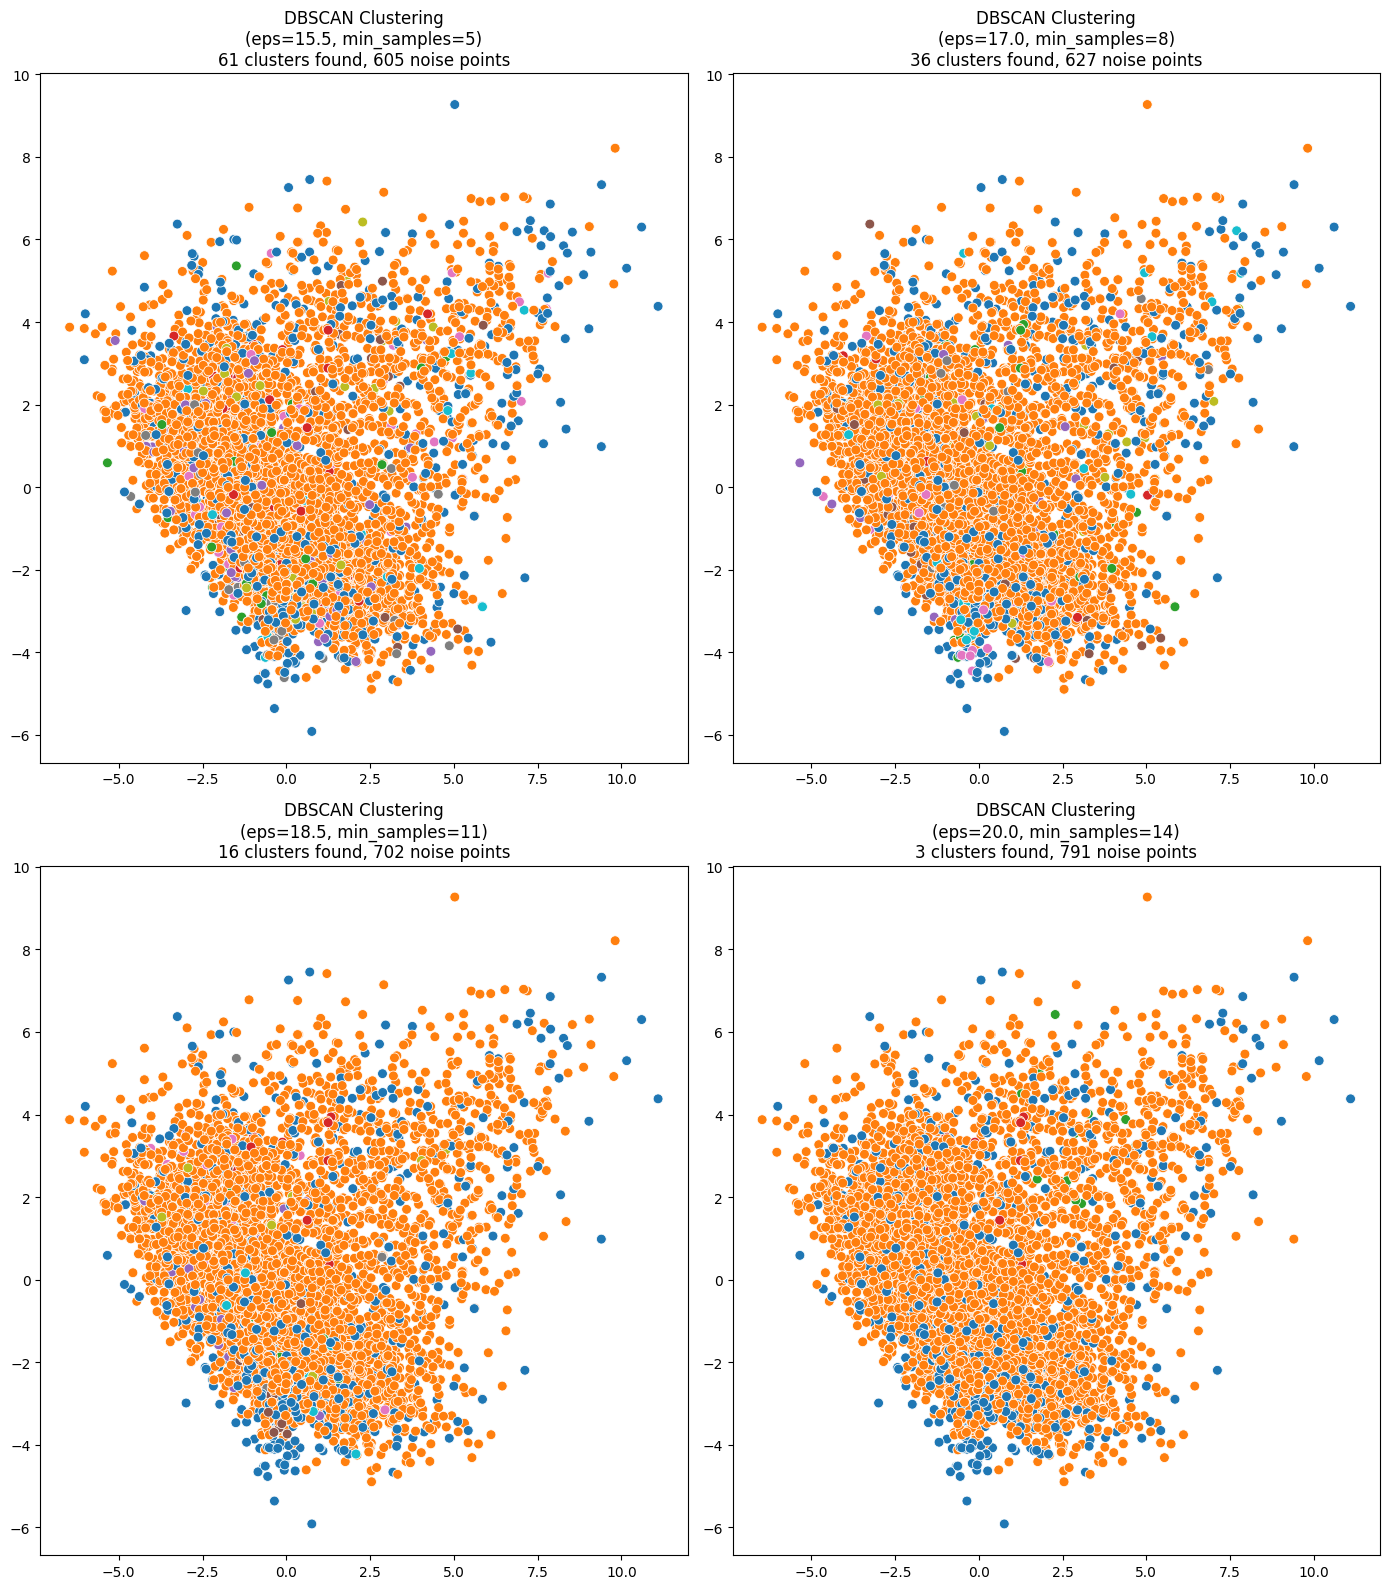

In [56]:
from sklearn.cluster import DBSCAN

eps_val = np.arange(15.5, 30, 1.5)
min_samples_val = np.arange(5, 20, 3)

results_df = pd.DataFrame(columns=['eps', 'min_samples', 'n_clusters', 'silhouette_score', 'noise'])
fig, axs = plt.subplots(len(min_samples_val)//2, 2, figsize=(14, 8*(len(min_samples_val)//2)))

custom_palette = sns.color_palette("tab10", n_colors=len(eps_val) * len(min_samples_val))

for i, ax in enumerate(axs.flatten()):
    eps = eps_val[i]
    min_samples = min_samples_val[i]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_reduced_df)
    silhouette_avg = silhouette_score(pca_reduced_df, labels)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    results_df = results_df.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'silhouette_score': silhouette_avg, 'noise': n_noise}, ignore_index=True)
    sns.scatterplot(x=pca_reduced_df[:, 0], y=pca_reduced_df[:, 1], hue=labels, palette=custom_palette, ax=ax, s=50)
    ax.set_title(f"DBSCAN Clustering\n(eps={eps}, min_samples={min_samples})\n{ n_clusters } clusters found, { n_noise } noise points")
    ax.legend().remove()  # Remove legend to avoid clutter

plt.tight_layout()
plt.show()

In [43]:
results_df

,eps,min_samples,n_clusters,silhouette_score,noise
0,15.5,5.0,61.0,0.204804,605.0
1,17.0,8.0,36.0,0.234230,627.0
2,18.5,11.0,16.0,0.249259,702.0
3,20.0,14.0,3.0,0.271426,791.0


**Performance Analysis**

The model with `eps=20.0` and `min_samples=14.0` seems to perform the best, as it has the highest silhouette score of `0.271426`. However, it also has the highest noise level of `791.0`, which means a significant number of data points were not assigned to any cluster. This could suggest that the model is oversimplifying the data.

On the other hand, the model with `eps=15.5` and `min_samples=5.0` has the lowest noise level of `605.0`, but its silhouette score is the lowest at `0.204804`. This could suggest that the model is overfitting the data.

Therefore, the “best” model depends on what is being prioritized: if a model that groups most of the data points is prioritized (i.e., lower noise), then the model with `eps=15.5` and `min_samples=5.0` might be the best. But if a model that creates more distinct clusters is to be prioritized (i.e., higher silhouette score), then the model with `eps=20.0` and `min_samples=14.0` might be the best.

## **Hierarchial Clustering**

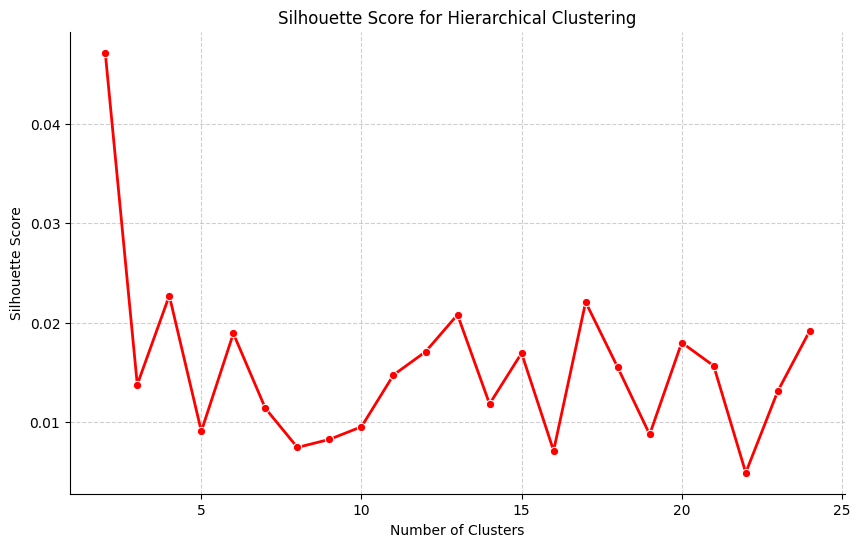

In [49]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(pca_reduced_df, method='ward')
hc_silhouette_scores = [silhouette_score(pca_reduced_df, fcluster(linkage_matrix, t=i, criterion='distance'), metric='euclidean') for i in range(2, 25)]

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 25), y=silhouette_scores, marker='o', color='red', linewidth=2)

plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

plt.show()

In [57]:
hc_silhouette_scores

[0.09766413448476162,
 0.1100493913278554,
 0.1223056180756929,
 0.1329009408350783,
 0.14469543762016107,
 0.1497128306865733,
 0.1557947481756264,
 0.15807087314034757,
 0.1591918493957006,
 0.16095392849475795,
 0.15840540102418857,
 0.158584969939834,
 0.1564290523725162,
 0.15313139750657034,
 0.15018663433642618,
 0.14853584678751278,
 0.14776281331066915,
 0.1426938790813274,
 0.14088394125480835,
 0.13954098648870294,
 0.13691396433373218,
 0.13681009407545788,
 0.13639527765964057]

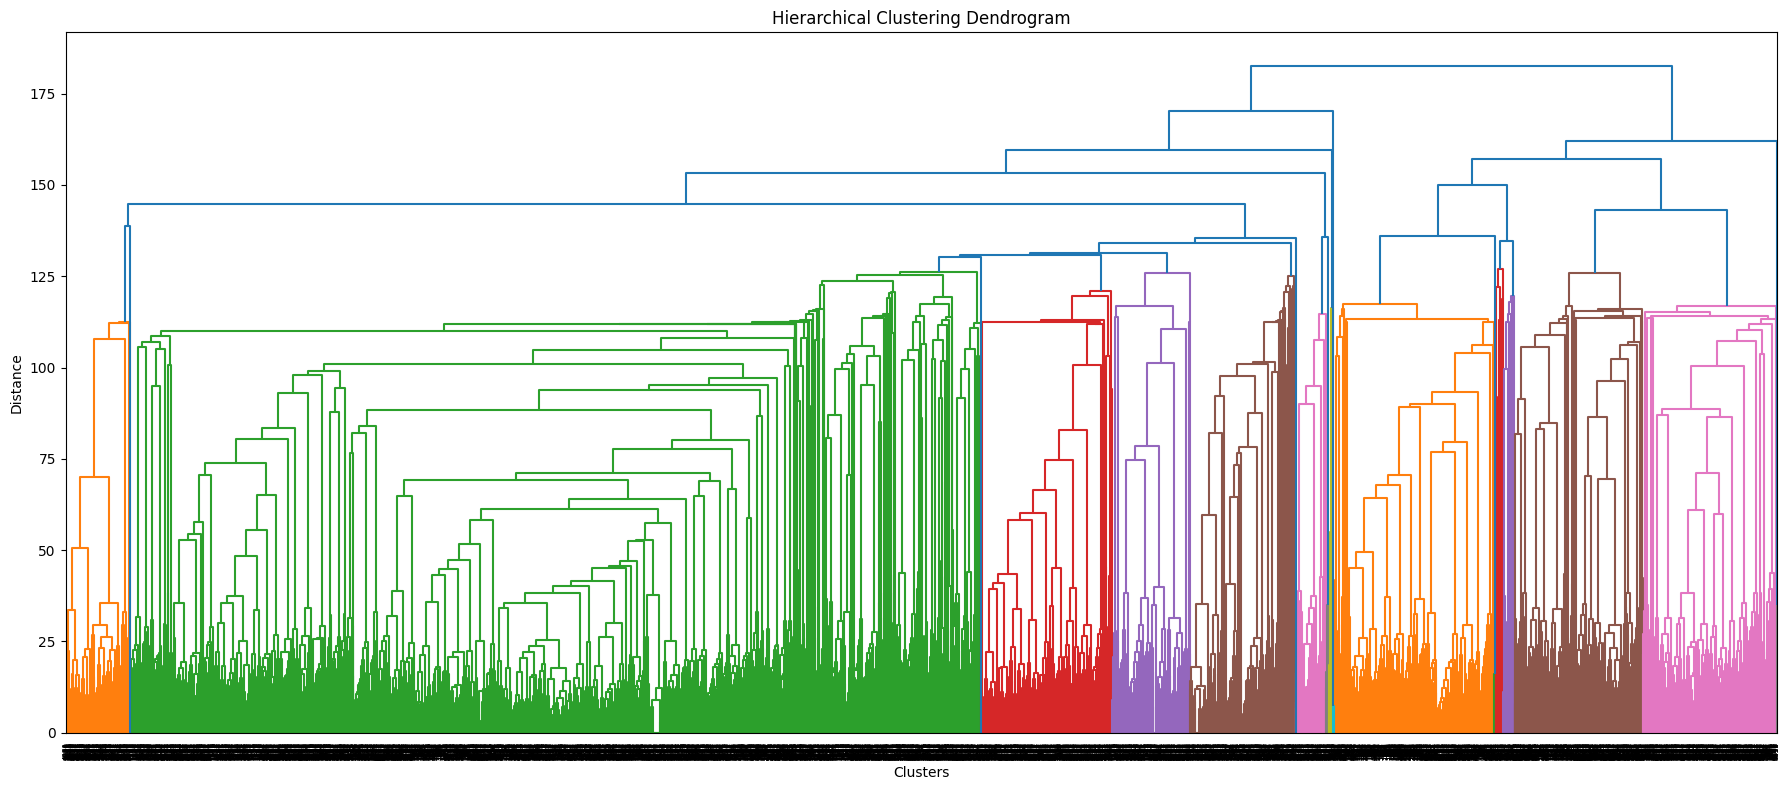

In [47]:
plt.figure(figsize=(18, 8))
dendrogram(linkage_matrix, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=True, color_threshold=None)

# Customize plot appearance
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.tight_layout()

# Display the dendrogram
plt.show()

**Performance Analysis**

The model with 11 clusters has the highest silhouette score of `0.16095392849475795`, suggesting that it might be the best model among these

## **Gaussian Mixture**

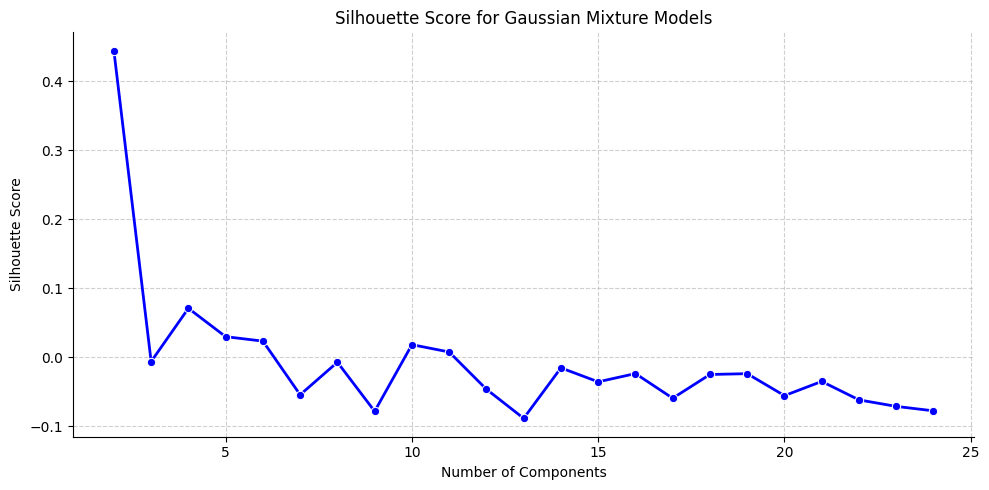

In [50]:
from sklearn.mixture import GaussianMixture

n_components_range = range(2, 25)

models = [GaussianMixture(n_components=n, covariance_type='full').fit(pca_reduced_df) for n in n_components_range]

gmm_silhouette_scores = [silhouette_score(pca_reduced_df, model.predict(pca_reduced_df)) for model in models]

plt.figure(figsize=(10, 5))
sns.lineplot(x=n_components_range, y=gmm_silhouette_scores, marker='o', color='blue', linewidth=2)

plt.title('Silhouette Score for Gaussian Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
gmm_silhouette_scores

[0.4442894861851355,
 -0.006476599686644415,
 0.07076743516948249,
 0.02963703220949054,
 0.023191297832126836,
 -0.05459797183240195,
 -0.007442845280379979,
 -0.07858598520125132,
 0.018038752444075747,
 0.007432362935818081,
 -0.04660336230766295,
 -0.0887901960374532,
 -0.015607244086327394,
 -0.03585079021797586,
 -0.023890641372405885,
 -0.0596247822312148,
 -0.025194788294167405,
 -0.024005993672864104,
 -0.05586365738282893,
 -0.03526736016462749,
 -0.06202738131175646,
 -0.07146050233289958,
 -0.07790076959999089]

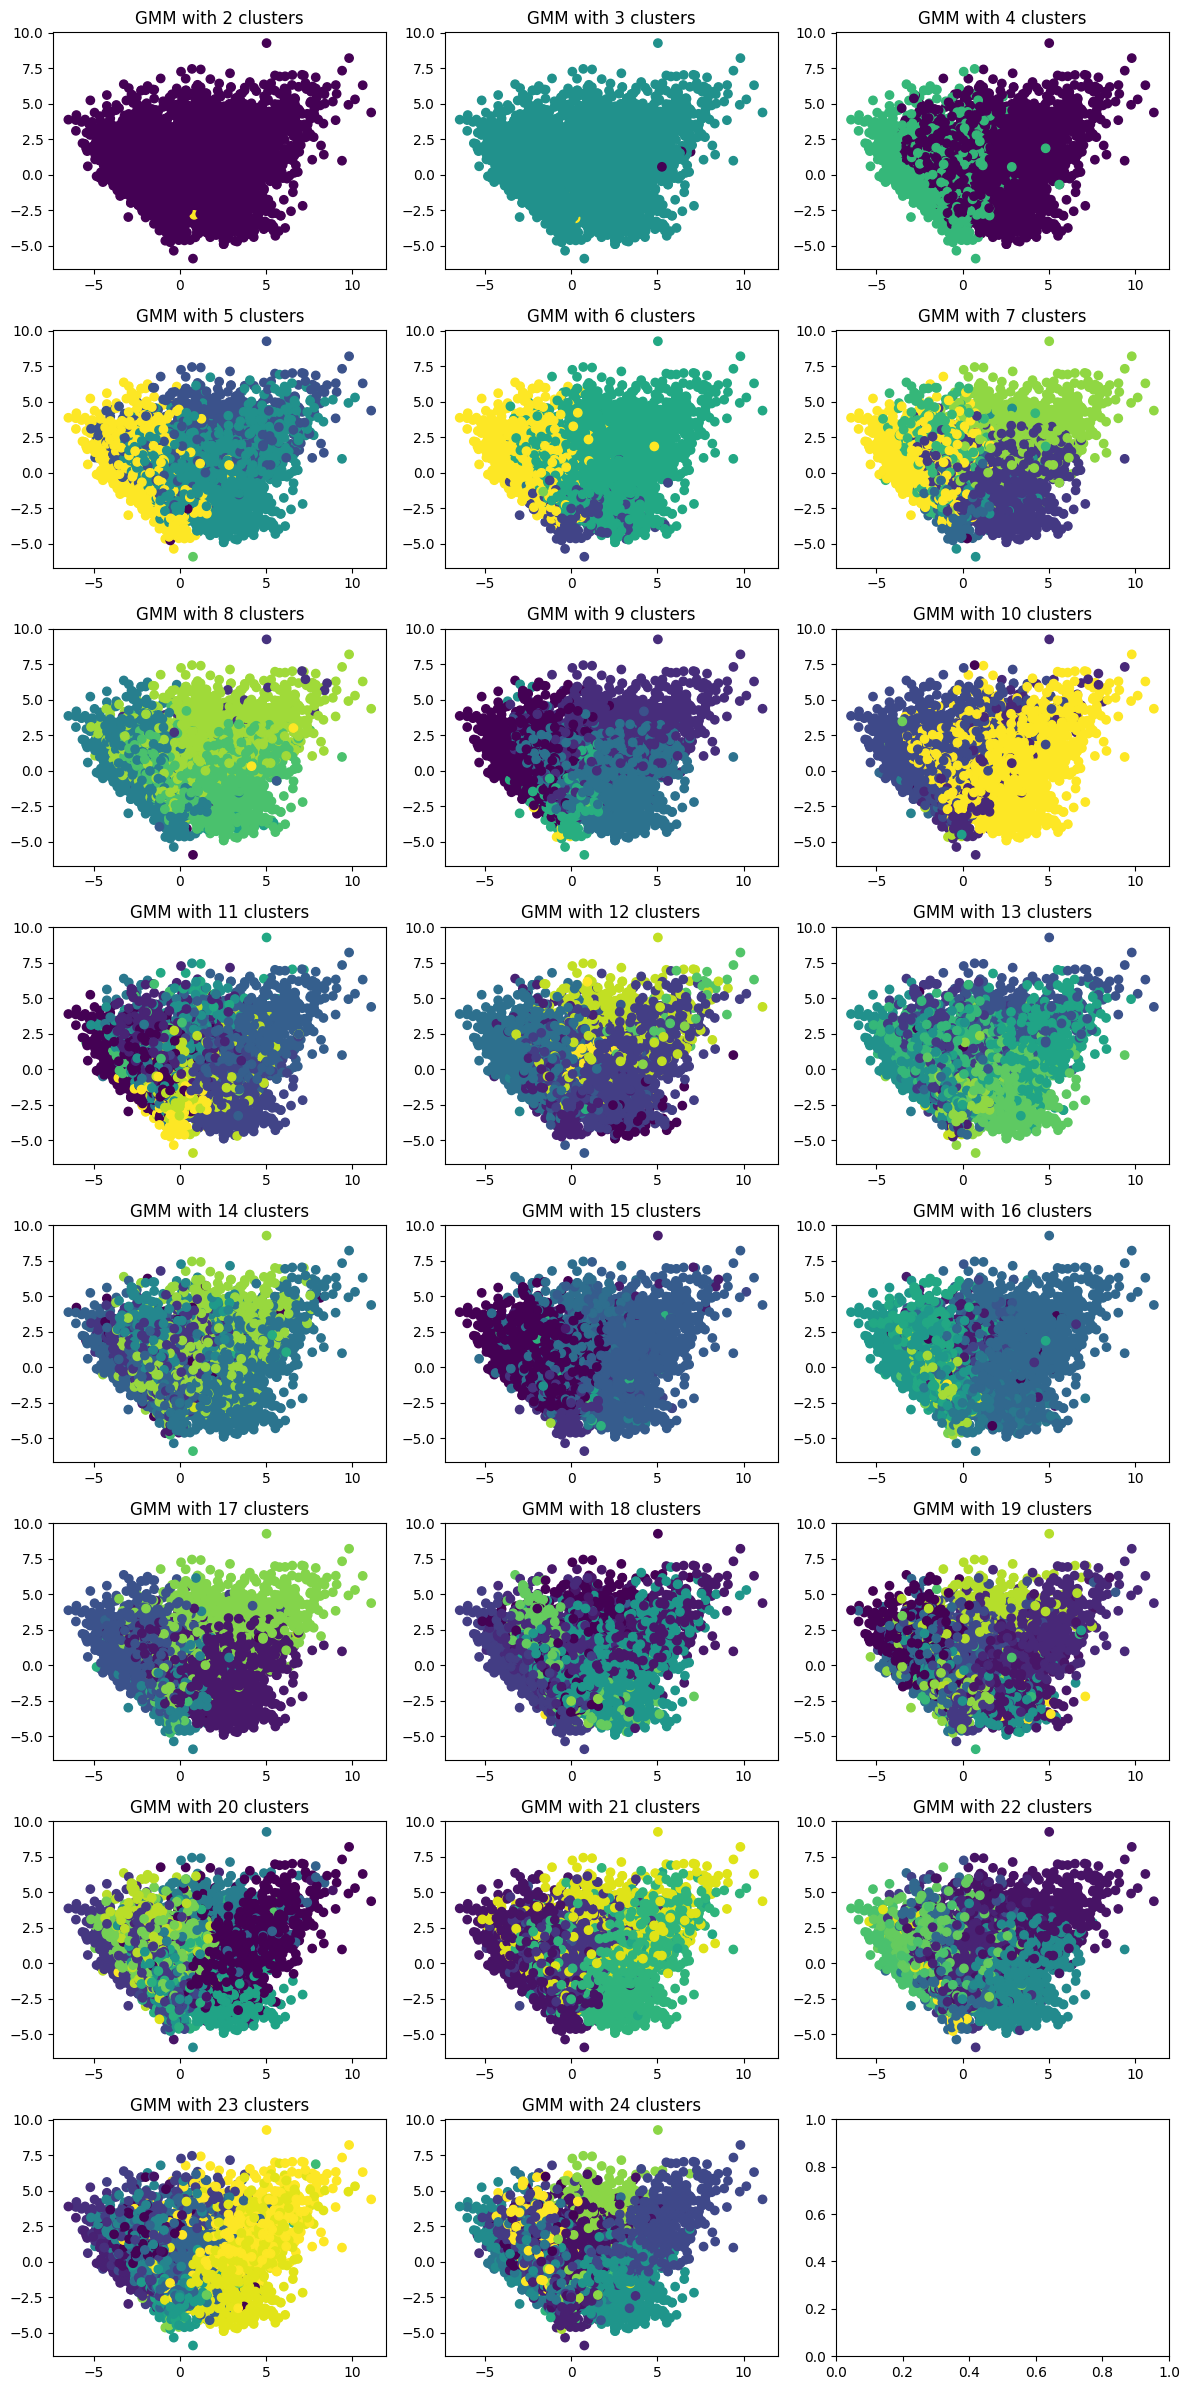

In [55]:
# visualize clusters for all cases
fig, axes = plt.subplots(8, 3, figsize=(12, 24))
for i, model in enumerate(models):
  gmm = model.fit(pca_reduced_df)
  n_clusters = gmm.n_components
  row, col = divmod(i, 3)
  ax = axes[row, col]
  ax.scatter(pca_reduced_df[:, 0], pca_reduced_df[:, 1], c=gmm.predict(pca_reduced_df))
  ax.set_title(f"GMM with {n_clusters} clusters")

plt.tight_layout()
plt.show()

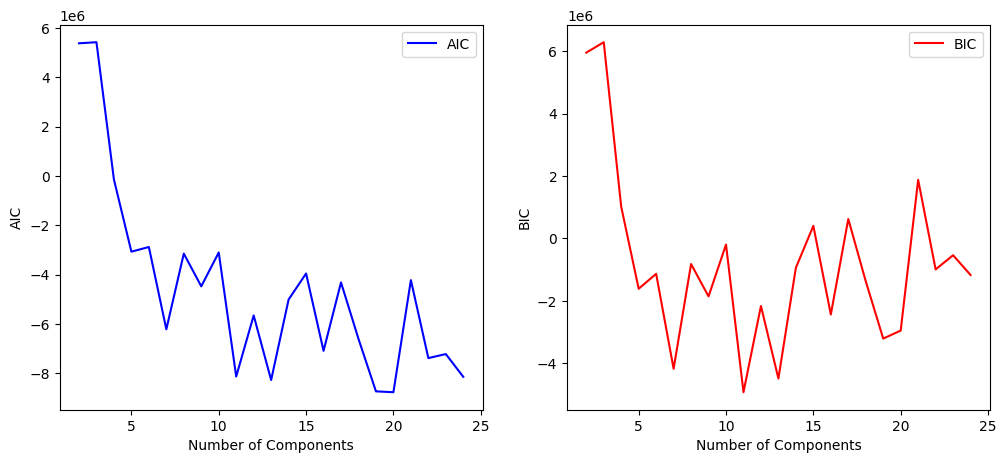

In [60]:
# compute AIC and BIC
AIC = [model.aic(pca_reduced_df) for model in models]
BIC = [model.bic(pca_reduced_df) for model in models]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(n_components_range, AIC, 'b-', label='AIC')
ax2.plot(n_components_range, BIC, 'r-', label='BIC')

ax1.set_xlabel('Number of Components')
ax1.set_ylabel('AIC')
ax1.legend()
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('BIC')
ax2.legend()

In [61]:
print(AIC)
print(BIC)

[5372072.850868445, 5415583.414740133, -149592.1175591231, -3072969.8765861313, -2883847.875261218, -6219211.591342257, -3151178.727150983, -4477825.895643182, -3105332.3579687322, -8133024.278507251, -5657422.846335176, -8275259.492379904, -5011520.732009731, -3957714.775871002, -7091842.971140953, -4319230.407196333, -6605952.033965594, -8733949.58978799, -8769002.528470427, -4225529.790340496, -7386109.637260295, -7222301.29349231, -8145802.126889683]
[5952581.867117006, 6286350.308640936, 1011432.6539939225, -1621687.2273808436, -1142307.348403688, -4187413.1868324853, -829122.4449889688, -1865511.7358289259, -202760.3205022337, -4940194.36338851, -2174335.0535641937, -4501913.821956679, -947917.1839342639, 396146.6498567071, -2447723.6677610017, 615146.7738358602, -1381316.9752811585, -3219056.6534513123, -2963851.7144815074, 1869878.901300666, -1000443.0679668915, -546376.846546663, -1179619.8022917956]


**Performance Analysis**

The model with 2 clusters has the highest silhouette score of `0.4442894861851355`, suggesting that it might be the best model among these. But as seen in the visualization it clearly not the best no. of clusters. We need to look at AIC and BIC for to obtain the optimal no. of clusters

The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are both measures used to determine the optimal number of clusters in a Gaussian Mixture Model (GMM). They do this by balancing the goodness-of-fit of the model with the complexity of the model (i.e., the number of clusters). The aim is find the minimum AIC and BIC values.

- AIC: The minimum value is `-8738914.471349845`. So, the optimal number of clusters according to AIC is `12`.
- BIC: The minimum value is `-4965568.80092662`. So, the optimal number of clusters according to BIC is `12`.

So, both AIC and BIC suggest that the best number of clusters for GMM-based clustering is `12`.


**Comparative Analysis:**

Comparing the models, GMM stands out with the highest silhouette score, indicating well-defined clusters. DBScan has a moderate silhouette score but a higher number of clusters and noise, suggesting a potential sensitivity to outliers. Hierarchical clustering requires further analysis to determine the optimal number of clusters.


**Strengths and Weaknesses:**

1. DBScan:

- Strengths: Ability to find clusters of arbitrary shapes, robust to outliers.
= Weaknesses: Sensitivity to hyperparameter choices, may produce varying results based on epsilon and min_samples.

2. Hierarchical Clustering:

- Strengths: Hierarchical representation, revealing relationships among data points.
- Weaknesses: Computationally expensive, subjective determination of the optimal number of clusters.

3. Gaussian Mixture Model (GMM):

- Strengths: Flexibility in capturing complex data patterns, accommodates clusters with different shapes.
- Weaknesses: Sensitive to parameter initialization, assumes Gaussian distribution for clusters.
